In [86]:
import pandas as pd
import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt

import matplotlib
import seaborn as sns
from collections import defaultdict

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)

**SUMMARY OF PACs**


In [3]:
headersSum = ['CMTE_ID','CMTE_NM','CMTE_TP','CMTE_DSGN', 'CMTE_FILING_FREQ','TTL_RECEIPTS','TRANS_FROM_AFF','INDV_CONTRIB','OTHER_POL_CMTE_CONTRIB','CAND_CONTRIB','CAND_LOANS','TTL_LOANS_RECEIVED','TTL_DISB','TRANF_TO_AFF','INDV_REFUNDS','OTHER_POL_CMTE_REFUNDS','CAND_LOAN_REPAY','LOAN_REPAY','COH_BOP','COH_COP','DEBTS_OWED_BY','NONFED_TRANS_RECEIVED','CONTRIB_TO_OTHER_CMTE','IND_EXP','PTY_COORD_EXP','NONFED_SHARE_EXP','CVG_END_DT']

In [4]:
pacSUM = pd.read_csv('pac_sum.txt', sep="|", index_col=False, names=headersSum)
pacSUM.head(5)

,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,CAND_LOANS,TTL_LOANS_RECEIVED,TTL_DISB,TRANF_TO_AFF,INDV_REFUNDS,OTHER_POL_CMTE_REFUNDS,CAND_LOAN_REPAY,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT
0,C00000059,HALLMARK CARDS PAC,Q,U,M,123198.92,0.0,123198.92,0.0,0.0,0.0,0.0,88500.00,0.0,0.00,0.0,0.0,0.0,104794.36,139493.28,0.0,0.0,88500.0,0.00,0.0,0.0,12/31/2016
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,Q,B,M,2114478.16,0.0,2099958.16,0.0,0.0,0.0,0.0,2047839.79,1790.0,12621.71,0.0,0.0,0.0,552464.38,619102.75,0.0,0.0,1853000.0,141616.35,0.0,0.0,12/31/2016
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,N,U,Q,41455.17,41453.0,0.00,0.0,0.0,0.0,0.0,39672.85,0.0,0.00,0.0,0.0,0.0,192.00,1974.00,0.0,0.0,0.0,0.00,0.0,0.0,12/31/2016
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,Q,U,Q,19065.00,0.0,19065.00,0.0,0.0,0.0,0.0,17592.50,2592.5,0.00,0.0,0.0,0.0,4681.26,6153.76,0.0,0.0,15000.0,0.00,0.0,0.0,12/31/2016
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,Q,U,Q,143170.00,0.0,142570.00,0.0,0.0,0.0,0.0,85918.48,13222.5,0.00,0.0,0.0,0.0,35530.91,92782.43,0.0,0.0,3000.0,0.00,0.0,0.0,12/31/2016


**FIND CANDITATES WE WANT TO ANALYSE**

In [5]:
headersCand = ['CAND_ID','CAND_NAME','CAND_ICI','PTY_CD', 'CAND_PTY_AFFILIATION','TTL_RECEIPTS','TRANS_FROM_AUTH','TTL_DISB','TRANS_TO_AUTH','COH_BOP','COH_COP','CAND_CONTRIB','CAND_LOANS','OTHER_LOANS','CAND_LOAN_REPAY','OTHER_LOAN_REPAY','DEBTS_OWED_BY','TTL_INDIV_CONTRIB','CAND_OFFICE_ST','CAND_OFFICE_DISTRICT','SPEC_ELECTION','PRIM_ELECTION','RUN_ELECTION','GEN_ELECTION','GEN_ELECTION_PRECENT','OTHER_POL_CMTE_CONTRIB','POL_PTY_CONTRIB','CVG_END_DT','INDIV_REFUNDS','CMTE_REFUNDS']

In [6]:
headersCand = pd.read_csv('cand_master_header_file.csv')
headersCand = headersCand.columns.tolist()
headersCand

['CAND_ID',
 'CAND_NAME',
 'CAND_PTY_AFFILIATION',
 'CAND_ELECTION_YR',
 'CAND_OFFICE_ST',
 'CAND_OFFICE',
 'CAND_OFFICE_DISTRICT',
 'CAND_ICI',
 'CAND_STATUS',
 'CAND_PCC',
 'CAND_ST1',
 'CAND_ST2',
 'CAND_CITY',
 'CAND_ST',
 'CAND_ZIP']

In [7]:
canditates = pd.read_csv('cand_master.txt', sep="|", index_col=False, names=headersCand)
canditates['CAND_ELECTION_YR'] = pd.to_numeric(canditates['CAND_ELECTION_YR'])


In [8]:
canditates.size

110940

In [9]:
presidentialCanditates = canditates[canditates['CAND_ELECTION_YR']==2016]
presidentialCanditates = presidentialCanditates[presidentialCanditates['CAND_OFFICE'] =='P']

presidentialCanditates[presidentialCanditates['CAND_NAME'].str.contains('TRUMP, DONALD') | presidentialCanditates['CAND_NAME'].str.contains('CLINTON, HILLARY')].head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
6298,P80001571,"TRUMP, DONALD J. / MICHAEL R. PENCE",REP,2016,US,P,0.0,O,C,C00580100,725 FIFTH AVENUE,NaN,NEW YORK,NY,10022.0


In [10]:
presidentialCanditates = presidentialCanditates[presidentialCanditates['CAND_NAME'].str.contains('TRUMP, DONALD') | presidentialCanditates['CAND_NAME'].str.contains('CLINTON, HILLARY')]
presidentialCanditates.head()

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
6298,P80001571,"TRUMP, DONALD J. / MICHAEL R. PENCE",REP,2016,US,P,0.0,O,C,C00580100,725 FIFTH AVENUE,NaN,NEW YORK,NY,10022.0


**FIND THE COMMITEES TARGETING THE TWO CANDITATES**

In [11]:
headersCandComLink = pd.read_csv('contr_com_to_cand_header_file.csv')
headersCandComLink = headersCandComLink.columns.tolist()

In [12]:
data_types = {header: np.str for header in headersCandComLink}
data_types['TRANSACTION_AMT'] = np.float

In [13]:
candComLinkage = pd.read_csv('contr_com_to_cand.txt', sep="|", index_col=False, names=headersCandComLink, dtype=data_types)
candComLinkage['TRANSACTION_DT']= pd.to_datetime(candComLinkage['TRANSACTION_DT'], format='%m%d%Y')
print(candComLinkage.shape)
candComLinkage.sample(5)


(516394, 22)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
56432,C00411389,N,YE,P,201601259004586460,24K,CCM,DEB FISCHER FOR US SENATE INC,LINCOLN,NE,68506,NaN,NaN,2015-11-02,1000.0,C00498907,S2NE00094,SB23.5032,1041973,NaN,NaN,4012520161260872628
132307,C00007880,N,M3,P2018,201603179009774583,24K,CCM,DONNELLY FOR INDIANA,WASHINGTON,DC,20036,NaN,NaN,2016-02-12,3000.0,C00393652,S2IN00091,2150849,1055873,NaN,NaN,4031720161276505418
335364,C00373696,N,M5,P2016,201605199015540572,24K,CCM,FRIENDS OF ROY BLUNT,COLUMBIA,MO,65205,NaN,NaN,2016-04-29,-1500.0,C00304758,S0MO00183,D173447,1072891,NaN,NaN,4051920161292935019
332296,C00012914,A,M6,G2016,201606169018412256,24K,CCM,GEORGE HOLDING FOR CONGRESS INC.,RALEIGH,NC,27624,NaN,NaN,2016-05-04,-4500.0,C00499236,H2NC13110,D804BAFF32B8551B000,1077947,X,NaN,4061720161299146636
296131,C00177469,N,M7,G2016,201607199020706452,24K,COM,RODNEY FOR CONGRESS,TAYLORVILLE,IL,62568,NaN,NaN,2016-06-03,500.0,C00521948,H2IL13120,EXPB242452,1088430,NaN,NaN,4072720161307203203


In [14]:
candComLinkage.size

11360668

In [15]:
pacs = pd.merge(pacSUM, candComLinkage, on='CMTE_ID', how='inner')
print(pacs.shape)
pacs.sample(5)

(509031, 48)


,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,CAND_LOANS,TTL_LOANS_RECEIVED,TTL_DISB,TRANF_TO_AFF,INDV_REFUNDS,OTHER_POL_CMTE_REFUNDS,CAND_LOAN_REPAY,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
387982,C90011156,WORKING AMERICA,I,U,Q,11373645.00,0.0,0.00,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,YE,G2016,201701319042141944,24E,IND,"DUNCAN, KEVIN",CHILLICOTHE,OH,456013570,NaN,NaN,2016-07-12,27.0,S6OH00254,S6OH00254,VN7CZA1PCE2,1144686,NaN,NaN,4020920171370054572
393981,C90011156,WORKING AMERICA,I,U,Q,11373645.00,0.0,0.00,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,YE,G2016,201701319042174553,24E,IND,"SIMONS, CHRISTOPHER",SWARTHMORE,PA,19081,NaN,NaN,2016-10-26,94.0,P00003392,P00003392,VN7CZA6EP91,1144686,NaN,NaN,4020920171370152400
381419,C90011156,WORKING AMERICA,I,U,Q,11373645.00,0.0,0.00,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,YE,G2016,201701319042182134,24A,IND,"LEBEL, DAVID",HILLIARD,OH,430267735,NaN,NaN,2016-11-06,2.0,P80001571,P80001571,VN7CZA7GVW9,1144686,NaN,NaN,4020920171370175141
450031,C90011156,WORKING AMERICA,I,U,Q,11373645.00,0.0,0.00,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,YE,G2016,201701319042164716,24E,IND,"SIMONS, CHRISTOPHER",SWARTHMORE,PA,19081,NaN,NaN,2016-10-07,68.0,S6PA00266,S6PA00266,VN7CZA4XWQ9,1144686,NaN,NaN,4020920171370122889
166400,C00287003,"PARSONS BRINCKERHOFF, INC. PAC",Q,B,M,258668.88,0.0,258668.88,0.0,0.0,0.0,0.0,260225.00,0.0,0.0,0.0,0.0,0.0,230424.84,228868.72,0.0,0.0,145450.0,0.0,0.0,0.0,12/31/2016,N,M4,P2016,201604139012308919,24K,CCM,LAHOOD FOR CONGRESS,PEORIA,IL,61612,NaN,NaN,2016-03-08,1000.0,C00575050,H6IL18088,70190499,1060477,NaN,CONTRIBUTION,4041320161283111612


**Merge the candidates**

In [16]:
pacsAndCands = pd.merge(pacs, presidentialCanditates[['CAND_ID', 'CAND_NAME']], on='CAND_ID', how='inner')
print(pacsAndCands.shape)
pacsAndCands.sample(5)

(111250, 49)


,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,CAND_LOANS,TTL_LOANS_RECEIVED,TTL_DISB,TRANF_TO_AFF,INDV_REFUNDS,OTHER_POL_CMTE_REFUNDS,CAND_LOAN_REPAY,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME
5276,C90011156,WORKING AMERICA,I,U,Q,11373645.0,0.0,0.0,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,Q3,G2016,201610129032252611,24A,IND,"DARCOURT, ANGEL",HOUSTON,TX,770083110,NaN,NaN,2016-08-23,6.0,P80001571,P80001571,VN7CZA2H8W7,1104329,NaN,NaN,4101320161340917970,"TRUMP, DONALD J. / MICHAEL R. PENCE"
61642,C90011156,WORKING AMERICA,I,U,Q,11373645.0,0.0,0.0,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,Q3,G2016,201610129032263041,24E,ORG,HAWTHORN SUITES,GREENSBORO,NC,274099421,NaN,NaN,2016-09-22,11.0,P00003392,P00003392,VN7CZA3VDS4,1104329,NaN,NaN,4101320161340949259,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
101398,C90011156,WORKING AMERICA,I,U,Q,11373645.0,0.0,0.0,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,YE,G2016,201701319042143890,24E,IND,"MURRAY, JAMES",PITTSBURGH,PA,152381420,NaN,NaN,2016-08-02,27.0,P00003392,P00003392,VN7CZA21RT7,1144686,NaN,NaN,4020920171370060410,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
71448,C90011156,WORKING AMERICA,I,U,Q,11373645.0,0.0,0.0,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,Q3,G2016,201610129032252234,24E,ORG,BALTIC RD. GULF,CLEVELAND,OH,441021715,NaN,NaN,2016-08-22,5.0,P00003392,P00003392,VN7CZA2FEQ3,1104329,NaN,NaN,4101320161340916839,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
33919,C90011156,WORKING AMERICA,I,U,Q,11373645.0,0.0,0.0,0.0,0.0,0.0,0.0,6547135.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12/31/2016,N,YE,G2016,201701319042149833,24A,IND,"DINES, MADISON",MILWAUKIE,OR,972226184,NaN,NaN,2016-08-31,22.0,P80001571,P80001571,VN7CZA2TKF8,1144686,NaN,NaN,4020920171370078239,"TRUMP, DONALD J. / MICHAEL R. PENCE"


In [17]:
pacsAndCandsFiltered = pacsAndCands[[ 'CMTE_ID', 'CAND_NAME', 'CMTE_NM', 'CMTE_TP', 'ENTITY_TP', 'TRANSACTION_TP', 
                                   'TRANSACTION_AMT', 'TTL_RECEIPTS', 'IND_EXP', 'NAME']]
pacsAndCandsFiltered.head(5)

,CMTE_ID,CAND_NAME,CMTE_NM,CMTE_TP,ENTITY_TP,TRANSACTION_TP,TRANSACTION_AMT,TTL_RECEIPTS,IND_EXP,NAME
0,C00000935,"TRUMP, DONALD J. / MICHAEL R. PENCE",DCCC,Y,ORG,24A,2168.0,2.208914e+08,80378630.35,"MOORE CAMPAIGNS, LLC"
1,C00000935,"TRUMP, DONALD J. / MICHAEL R. PENCE",DCCC,Y,ORG,24A,836.0,2.208914e+08,80378630.35,"MOORE CAMPAIGNS, LLC"
2,C00000935,"TRUMP, DONALD J. / MICHAEL R. PENCE",DCCC,Y,ORG,24A,77062.0,2.208914e+08,80378630.35,GREAT AMERICAN MEDIA
3,C00000935,"TRUMP, DONALD J. / MICHAEL R. PENCE",DCCC,Y,ORG,24A,108354.0,2.208914e+08,80378630.35,GREAT AMERICAN MEDIA
4,C00000935,"TRUMP, DONALD J. / MICHAEL R. PENCE",DCCC,Y,ORG,24A,6220.0,2.208914e+08,80378630.35,"RALSTON LAPP MEDIA, LLC"


In [18]:
pacsAndCandsFiltered = pacsAndCandsFiltered[pacsAndCandsFiltered['TRANSACTION_AMT']>0]

**GET SUPERPACS**<br>
Superpacs are defined by their comittee type('O')<br>
https://www.fec.gov/campaign-finance-data/committee-type-code-descriptions/


In [98]:
superPacs = pacsAndCandsFiltered[pacsAndCandsFiltered['CMTE_TP']=='O']
superPacs.shape
superPacs.sample(5)

,CMTE_ID,CAND_NAME,CMTE_NM,CMTE_TP,ENTITY_TP,TRANSACTION_TP,TRANSACTION_AMT,TTL_RECEIPTS,IND_EXP,NAME
2133,C00607697,"TRUMP, DONALD J. / MICHAEL R. PENCE",OUR VOICE MATTERS SUPER PAC,O,ORG,24E,6000.0,80000.00,76300.00,"SMPS CONSULTING, LLC"
111015,C00625533,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",NEW AMERICAN JOBS FUND,O,ORG,24E,172078.0,5805000.00,5745908.69,"TERRA STRATEGIES, LLC"
52743,C00609388,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",BLACK PAC,O,ORG,24E,25000.0,3713763.07,2980000.11,SEIU FLORIDA STATE COUNCIL
3253,C00623256,"TRUMP, DONALD J. / MICHAEL R. PENCE",AMERICA COMES FIRST PAC,O,IND,24E,125.0,231865.00,185697.60,"EDWARDS, WILLIE"
1575,C00569905,"TRUMP, DONALD J. / MICHAEL R. PENCE",THE 2016 COMMITTEE,O,ORG,24E,340.0,15020143.14,6167228.28,WASHINGTON INTELLIGENCE BUREAU


**FIND TOP FOR EACH CANDIDATE**

In [100]:
hillaryPacs = superPacs[superPacs['CAND_NAME'].str.contains('CLINTON, HILLARY')]
hillaryPacs = hillaryPacs[['CMTE_ID', 'CMTE_NM', 'TRANSACTION_AMT','TTL_RECEIPTS']]
hillaryPacs.head(5)

,CMTE_ID,CMTE_NM,TRANSACTION_AMT,TTL_RECEIPTS
47327,C00405878,AMERICANS FOR LEGAL IMMIGRATION PAC,174.0,210920.58
47395,C00473918,WOMEN VOTE!,2857.0,36685866.33
47396,C00473918,WOMEN VOTE!,14200.0,36685866.33
47397,C00473918,WOMEN VOTE!,5800.0,36685866.33
47398,C00473918,WOMEN VOTE!,2857.0,36685866.33


In [102]:
trumpPacs = superPacs[superPacs['CAND_NAME'].str.contains('TRUMP, DONALD J.')]
trumpPacs = trumpPacs[['CMTE_ID', 'CMTE_NM', 'TRANSACTION_AMT','TTL_RECEIPTS']]
trumpPacs.head(5)

,CMTE_ID,CMTE_NM,TRANSACTION_AMT,TTL_RECEIPTS
833,C00473918,WOMEN VOTE!,12333.0,36685866.33
834,C00473918,WOMEN VOTE!,93219.0,36685866.33
835,C00473918,WOMEN VOTE!,673224.0,36685866.33
836,C00473918,WOMEN VOTE!,450000.0,36685866.33
837,C00473918,WOMEN VOTE!,558000.0,36685866.33


In [107]:
trumpPacs.groupby(['CMTE_ID', 'CMTE_NM']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).head(5)

,,TRANSACTION_AMT,TTL_RECEIPTS
CMTE_ID,CMTE_NM,,
C00495861,PRIORITIES USA ACTION,126062193.0,3.226705e+10
C00603621,OUR PRINCIPLES PAC,16353117.0,3.900105e+09
C00615815,NEXTGEN CALIFORNIA ACTION COMMITTEE,13240861.0,7.013293e+08
C00625525,LIFT LEADING ILLINOIS FOR TOMORROW,9922027.0,1.043675e+08
C00523621,UNITED WE CAN,8674114.0,2.686975e+09


In [108]:
hillaryPacs.groupby(['CMTE_ID', 'CMTE_NM']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).head(5)

,,TRANSACTION_AMT,TTL_RECEIPTS
CMTE_ID,CMTE_NM,,
C00574533,FUTURE45,24195670.0,5.199276e+09
C00618876,REBUILDING AMERICA NOW,17184458.0,1.133593e+09
C00495861,PRIORITIES USA ACTION,6473727.0,1.786212e+10
C00486845,LCV VICTORY FUND,6283002.0,4.322814e+08
C00490730,RGA RIGHT DIRECTION PAC,5728857.0,9.112688e+08


**2. Identify the top 10 individual donors (i.e., persons) for each of the two presidential candidates<brk>
and the amount they spent. In order to do that, you should know that donations are not always to a fundraising<brk>
committee that can be directly linked to a candidate, but they can be due to other entities such as PACs.**


**READ THE CONTRIBUTIONS OF INDIVIDUALS**

In [21]:
headersContrIndiv = pd.read_csv('contr_indiv_header_file.csv')
headersContrIndiv = headersContrIndiv.columns.tolist()

In [22]:
data_types = {header:np.str for header in headersContrIndiv}
data_types['TRANSACTION_AMT'] = np.float

In [23]:
contr = pd.read_csv('contr_indiv/itcont.txt', sep="|", index_col=False, names=headersContrIndiv, dtype=data_types)
print(contr.shape)
contr.head(5)

(20498303, 21)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00088591,N,M3,P,15970306895,15,IND,"BURCH, MARY K.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP PROGRAM MANAGEMENT,02132015,500.0,NaN,2A8EE0688413416FA735,998834,NaN,NaN,4032020151240885624
1,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02132015,200.0,NaN,20150211113220-479,998834,NaN,NaN,4032020151240885819
2,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02272015,200.0,NaN,20150225112333-476,998834,NaN,NaN,4032020151240885820
3,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02132015,200.0,NaN,20150309_2943,998834,NaN,NaN,4032020151240885683
4,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02272015,200.0,NaN,20150224153748-2525,998834,NaN,NaN,4032020151240885684


In [24]:
contr = contr[contr['TRANSACTION_AMT']>0]

**LINK THE CONTRIBUTIONS WITH THE CANDITATES THE COMMITEES SUPPORT**

In [25]:
headersCom = pd.read_csv('comm_header_file.csv')
headersCom = headersCom.columns.tolist()

In [26]:
committees = pd.read_csv('comm.txt', sep="|", index_col=False, names=headersCom)
committees.head(5)

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,ERIN BROWER,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


In [27]:
contributionsWithCommittees = pd.merge(contr, committees[['CMTE_ID','CAND_ID','CMTE_NM']], on='CMTE_ID', how='inner')
contributionsWithCommittees.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_ID,CMTE_NM
0,C00088591,N,M3,P,15970306895,15,IND,"BURCH, MARY K.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP PROGRAM MANAGEMENT,02132015,500.0,NaN,2A8EE0688413416FA735,998834,NaN,NaN,4032020151240885624,NaN,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC
1,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02132015,200.0,NaN,20150211113220-479,998834,NaN,NaN,4032020151240885819,NaN,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC
2,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,DIR PROGRAMS,02272015,200.0,NaN,20150225112333-476,998834,NaN,NaN,4032020151240885820,NaN,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC
3,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02132015,200.0,NaN,20150309_2943,998834,NaN,NaN,4032020151240885683,NaN,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC
4,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,220424511,NORTHROP GRUMMAN,VP AND CFO,02272015,200.0,NaN,20150224153748-2525,998834,NaN,NaN,4032020151240885684,NaN,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC


In [28]:
contributionsWithCommittees = pd.merge(contributionsWithCommittees, presidentialCanditates[['CAND_ID', 'CAND_NAME']], on='CAND_ID', how='inner')
contributionsWithCommittees.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_ID,CMTE_NM,CAND_NAME
0,C00575795,A,Q2,P2016,201509039001600101,15,IND,"CLARY, CAROLE",DESTIN,FL,325405205,"CPR OF DESTIN, INC.",VP/DIRECTOR OF OPERATIONS,06152015,50.0,NaN,C240090,1024052,NaN,NaN,4090920151249600958,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
1,C00575795,A,Q2,P2016,201509039001600101,15,IND,"FEW, MELANIE",DALLAS,TX,752011123,ACE CASH EXPRESS,MARKETING,04122015,5.0,NaN,C17450,1024052,NaN,NaN,4090920151249600959,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
2,C00575795,A,Q2,P2016,201509039001600101,15,IND,"SPURLOCK, MICHAEL",NASHVILLE,TN,372036615,NaN,NOT EMPLOYED,06132015,50.0,NaN,C234270,1024052,NaN,NaN,4090920151249600960,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
3,C00575795,A,Q2,P2016,201509039001600102,15,IND,"ELIAS, JOHN",WASHINGTON,DC,200053743,U.S. DEPARTMENT OF JUSTICE,ATTORNEY,06112015,100.0,NaN,C223180,1024052,NaN,NaN,4090920151249600961,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
4,C00575795,A,Q2,P2016,201509039001600102,15,IND,"SHIFTON, CONSTANCE",CHERRY HILL,NJ,080031314,SELF-EMPLOYED,EDUCATIONAL ADVISOR,06122015,50.0,NaN,C229360,1024052,NaN,NaN,4090920151249600962,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"


Separate the two candidate contributions

In [29]:
hillaryContributions = contributionsWithCommittees[contributionsWithCommittees['CAND_NAME'].str.contains('CLINTON, HILLARY')]
hillaryContributions = hillaryContributions[['NAME', 'TRANSACTION_AMT']]
hillaryContributions.head(5)

,NAME,TRANSACTION_AMT
0,"CLARY, CAROLE",50.0
1,"FEW, MELANIE",5.0
2,"SPURLOCK, MICHAEL",50.0
3,"ELIAS, JOHN",100.0
4,"SHIFTON, CONSTANCE",50.0


In [30]:
trumpContributions = contributionsWithCommittees[contributionsWithCommittees['CAND_NAME'].str.contains('TRUMP, DONALD J.')]
trumpContributions = trumpContributions[['NAME', 'TRANSACTION_AMT']]
trumpContributions.head(5)

,NAME,TRANSACTION_AMT
2515042,"BONNETT, ELLIOTT",60.0
2515043,"FISHER, SANDI",100.0
2515044,"FLAHART, MICHAEL",50.0
2515045,"FLANAGAN, DAVID",162.0
2515046,"LANDES, PATRICIA",10.0


Show the top contributors

In [31]:
hillaryContributions.groupby(['NAME']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).head(5)

,TRANSACTION_AMT
NAME,
"CLINTON, HILLARY RODHAM",1450306.0
"RUNYAN, R. BRADLEY",35100.0
"SMITH, MICHAEL",33909.0
"BURNS, URSULA",32400.0
"FRIEDMAN, JANELLE",32400.0


In [32]:
trumpContributions.groupby(['NAME']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).head(5)

,TRANSACTION_AMT
NAME,
"TRUMP, DONALD J",10033637.0
"TRUMP, DONALD J.",6532038.0
"TRUMP, DONALD J J.",2067482.0
"BOCH, ERNIE",171172.0
"TREIBEL, RANDY",52352.0


An interesting result (Some may say "you are your biggest fan")

**3. Investigate the chronological evolution of the contributions made to and the expenditures made by the campaigns.**

In [33]:
contributionsWithCommittees['TRANSACTION_DT'] = pd.to_datetime(contributionsWithCommittees['TRANSACTION_DT'], format='%m%d%Y')
contributionsWithCommittees.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_ID,CMTE_NM,CAND_NAME
0,C00575795,A,Q2,P2016,201509039001600101,15,IND,"CLARY, CAROLE",DESTIN,FL,325405205,"CPR OF DESTIN, INC.",VP/DIRECTOR OF OPERATIONS,2015-06-15,50.0,NaN,C240090,1024052,NaN,NaN,4090920151249600958,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
1,C00575795,A,Q2,P2016,201509039001600101,15,IND,"FEW, MELANIE",DALLAS,TX,752011123,ACE CASH EXPRESS,MARKETING,2015-04-12,5.0,NaN,C17450,1024052,NaN,NaN,4090920151249600959,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
2,C00575795,A,Q2,P2016,201509039001600101,15,IND,"SPURLOCK, MICHAEL",NASHVILLE,TN,372036615,NaN,NOT EMPLOYED,2015-06-13,50.0,NaN,C234270,1024052,NaN,NaN,4090920151249600960,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
3,C00575795,A,Q2,P2016,201509039001600102,15,IND,"ELIAS, JOHN",WASHINGTON,DC,200053743,U.S. DEPARTMENT OF JUSTICE,ATTORNEY,2015-06-11,100.0,NaN,C223180,1024052,NaN,NaN,4090920151249600961,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
4,C00575795,A,Q2,P2016,201509039001600102,15,IND,"SHIFTON, CONSTANCE",CHERRY HILL,NJ,080031314,SELF-EMPLOYED,EDUCATIONAL ADVISOR,2015-06-12,50.0,NaN,C229360,1024052,NaN,NaN,4090920151249600962,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"


Focus on creating a table that includes contribution information from both committees and individuals.<brk> 
Concat the two tables

In [34]:
comAndCand = pd.merge(candComLinkage, presidentialCanditates[['CAND_ID', 'CAND_NAME']], on='CAND_ID', how='inner')
comAndCand.sample(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME
10388,C90011156,N,Q3,G2016,201610129032264188,24E,ORG,BUDGET-ORLANDO,ORLANDO,FL,328097912,NaN,NaN,2016-09-26,8.0,P00003392,P00003392,VN7CZA40V89,1104329,NaN,NaN,4101320161340952701,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
100118,C90011156,N,YE,G2016,201701319042180210,24A,IND,"SADJI, YAWO",CANAL WINCHESTER,OH,431109017,NaN,NaN,2016-11-03,72.0,P80001571,P80001571,VN7CZA78EG5,1144686,NaN,NaN,4020920171370169371,"TRUMP, DONALD J. / MICHAEL R. PENCE"
51474,C90011156,N,YE,G2016,201701319042151778,24E,IND,"BERAUT, GENESSON",ORLANDO,FL,32808,NaN,NaN,2016-09-07,34.0,P00003392,P00003392,VN7CZA32XV7,1144686,NaN,NaN,4020920171370084075,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
65996,C00569905,A,30G,G2016,201701279041526534,24E,ORG,PROGRESS PRINTING PLUS,LYNCHBURG,VA,24502,NaN,NaN,2016-11-08,2524.0,P80001571,P80001571,SE24.93654,1142488,NaN,NaN,4021020171370392752,"TRUMP, DONALD J. / MICHAEL R. PENCE"
54960,C90011156,N,YE,G2016,201701319042145393,24E,IND,"MATHEWS, TAYLOR",COLUMBUS,OH,432193164,NaN,NaN,2016-08-11,27.0,P00003392,P00003392,VN7CZA27XA0,1144686,NaN,NaN,4020920171370064919,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"


In [35]:
allContributions = pd.concat([comAndCand[['CMTE_ID','NAME','TRANSACTION_AMT','TRANSACTION_TP','TRANSACTION_DT', 'CAND_NAME']],contributionsWithCommittees[['CMTE_ID','NAME','TRANSACTION_AMT','TRANSACTION_TP','TRANSACTION_DT', 'CAND_NAME']]])
print(allContributions.shape)
allContributions.sample(5)

(2773450, 6)


,CMTE_ID,NAME,TRANSACTION_AMT,TRANSACTION_TP,TRANSACTION_DT,CAND_NAME
2029797,C00575795,"HAMMETT, RUTH",250.0,15,2016-07-23,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
1305051,C00575795,"MORRISON, JOHN",50.0,15,2016-10-10,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
273327,C00575795,"STANTON, MELISSA",24.0,22Y,2016-11-06,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
2608356,C00580100,"COOKSON, JOHN",100.0,15,2016-07-30,"TRUMP, DONALD J. / MICHAEL R. PENCE"
1289332,C00575795,"DOTSON, REBECCA",22.0,15,2016-10-09,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"


We view what types of transactions we want to track 

In [36]:
validContributions = allContributions.loc[allContributions['TRANSACTION_TP'].isin(['15', '15E', '11', '15C','24K', '24A', '24E', '24F', '24N',
                                                                                       '24T', '24I', '10', '32', '30', '32T','19', '30T'])].copy()

In [37]:
groupedDateContributions = validContributions.groupby(['TRANSACTION_DT', 'CAND_NAME']).sum()
print(groupedDateContributions.shape)
groupedDateContributions.sample(5)

(1193, 1)


,,TRANSACTION_AMT
TRANSACTION_DT,CAND_NAME,
2016-04-20,"TRUMP, DONALD J. / MICHAEL R. PENCE",709644.0
2016-01-08,"TRUMP, DONALD J. / MICHAEL R. PENCE",7915.0
2015-11-04,"TRUMP, DONALD J. / MICHAEL R. PENCE",13023.0
2016-04-02,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",234656.0
2015-11-04,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",302160.0


In [38]:
validContributions["MONTH"] = pd.DatetimeIndex(validContributions['TRANSACTION_DT']).month
validContributions["YEAR"] = pd.DatetimeIndex(validContributions['TRANSACTION_DT']).year
allContributions2016 = validContributions[(validContributions['YEAR']==2016)]
allContributions2016.sample(5)

,CMTE_ID,NAME,TRANSACTION_AMT,TRANSACTION_TP,TRANSACTION_DT,CAND_NAME,MONTH,YEAR
715235,C00575795,"CHEN, ROSE",25.0,15,2016-10-18,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",10.0,2016.0
1347654,C00575795,"LACY, DIANE",15.0,15,2016-09-12,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",9.0,2016.0
831953,C00575795,"NOVAK, ALEXANDRA",25.0,15,2016-10-13,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",10.0,2016.0
1353692,C00575795,"COUGHLIN, ROBERT",19.0,15,2016-09-01,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",9.0,2016.0
92845,C00575795,"RAY, FRANCES",15.0,15,2016-10-30,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",10.0,2016.0


In [39]:
trumpContrDates = allContributions2016[allContributions2016['CAND_NAME'].str.contains('TRUMP, DONALD J.')]
trumpContrDates16 = trumpContrDates[trumpContrDates["YEAR"]==2016]

In [40]:
hillaryContrDates = allContributions2016[allContributions2016['CAND_NAME'].str.contains('CLINTON, HILLARY')]
hillaryContrDates16 = hillaryContrDates[hillaryContrDates["YEAR"]==2016]

In [41]:
groupedDateTrumpContributions = trumpContrDates.groupby(['TRANSACTION_DT']).sum().reset_index()
groupedDateTrumpContributions.dtypes

TRANSACTION_DT     datetime64[ns]
TRANSACTION_AMT           float64
MONTH                     float64
YEAR                      float64
dtype: object

In [42]:
groupedMonthTrumpContributions = trumpContrDates16.groupby(['MONTH', 'YEAR']).sum().reset_index()
groupedMonthTrumpContributions.sample(5)

,MONTH,YEAR,TRANSACTION_AMT
2,3.0,2016.0,18454311.0
3,4.0,2016.0,5694693.0
0,1.0,2016.0,3940038.0
7,8.0,2016.0,33813688.0
6,7.0,2016.0,32623846.0


In [43]:
groupedMonthHillaryContributions = hillaryContrDates16.groupby(['MONTH','YEAR']).sum().reset_index()

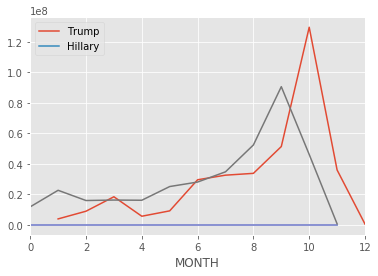

In [44]:
ax = groupedMonthTrumpContributions.plot(x="MONTH", y="TRANSACTION_AMT")
groupedMonthHillaryContributions.plot(ax=ax)
ax.legend(["Trump", "Hillary"])

Interesting to see that Hillary was actually the one to usually be on top

**Regarding expenses**

In [45]:
headersExp = pd.read_csv('oppexp_header_file.csv')
headersExp = headersExp.columns.tolist()

In [61]:
oppExpenses = pd.read_csv('oppexp.txt', sep="|", index_col=False, names=headersExp)
oppExpenses.head(5)

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
0,C00415182,N,2015,Q1,15951142498,17,F3,SB,CHASE CARDMEMBER SERVICE,WILMINGTON,DE,198865153,02/21/2015,3301.24,P2016,CREDIT CARD PAYMENT,001,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4041520151241882404,1002978,VN81E9TS8X8,NaN
1,C00415182,N,2015,Q1,15951142495,17,F3,SB,GOOGLE INC.,SAN FRANCISCO,CA,941390001,01/21/2015,56.42,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882396,1002978,VN81E9TQB00,VN81E9TQAP1
2,C00415182,N,2015,Q1,15951142495,17,F3,SB,LINKEDIN CORPORATION,MOUNTAIN VIEW,CA,94043,01/21/2015,49.95,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882397,1002978,VN81E9TQB76,VN81E9TQAP1
3,C00415182,N,2015,Q1,15951142496,17,F3,SB,NATIONBUILDER,LOS ANGELES,CA,900131155,01/21/2015,99.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882398,1002978,VN81E9TS9X1,VN81E9TQAP1
4,C00415182,N,2015,Q1,15951142496,17,F3,SB,"NGP VAN, INC.",WASHINGTON,DC,20005,01/21/2015,2000.00,P2016,INTERNET SERVICE,001,Administrative/Salary/Overhead Expenses,X,*,ORG,4041520151241882399,1002978,VN81E9TQAX7,VN81E9TQAP1


In [62]:
oppExpenses = oppExpenses.loc[oppExpenses['TRANSACTION_AMT'] > 0]

In [63]:
oppExpenses = pd.merge(oppExpenses, committees[['CMTE_ID','CAND_ID', 'CMTE_NM']], on='CMTE_ID', how='inner')
print(oppExpenses.shape)
oppExpenses.sample(5)

(1732174, 27)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID,CAND_ID,CMTE_NM
1686426,C00380568,A,2016,30G,201701239041444841,21B,F3X,SB,AT&T,CAROL STREAM,IL,601975014,10/26/2016,136.96,NaN,PHONES,001,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4012420171368498265,1140581,EXPB7122,NaN,NaN,PASADENA AREA UNITED DEMOCRATIC HEADQUARTERS
447331,C00499236,N,2015,YE,201601299004765786,17,F3,SB,AMERICAN AIRLINES,FORT WORTH,TX,76155,10/16/2015,216.20,P2016,AIRFARE,1,Administrative/Salary/Overhead Expenses,NaN,AIRFARE,ORG,4012920161261314098,1044796,SB17-EX2910,NaN,H2NC13110,GEORGE HOLDING FOR CONGRESS INC.
46110,C00376673,N,2016,Q3,201610149032530456,17,F3,SB,ACTBLUE,CAMBRIDGE,MA,022382110,09/21/2016,172.33,G2016,ACTBLUE FEE,NaN,NaN,NaN,NaN,ORG,4102620161345295945,1107385,D652812,NaN,H2MD02160,DUTCH RUPPERSBERGER FOR CONGRESS COMMITTEE
418295,C00431684,N,2015,Q3,201510159002916453,17,F3,SB,COMCAST,LINDON,UT,840421914,08/16/2015,110.05,P2016,INTERNET,NaN,NaN,X,NaN,ORG,4101620151255936369,1028771,BC768C38D5BFA4AE4BF4,B4EEBDBE6DEEC4D0BAAE,H8UT03089,FRIENDS OF JASON CHAFFETZ
1318998,C00586537,A,2016,30G,201708309071166369,21B,F3X,SB,AMERICAN EXPRESS,NEWARK,NJ,071011270,10/10/2016,9.00,NaN,TRAVEL,NaN,NaN,X,NaN,ORG,4083120171447889673,1180811,D351999,D347508,NaN,HILLARY VICTORY FUND


In [64]:
presidentialOppExpenses = pd.merge(oppExpenses, presidentialCanditates[['CAND_ID', 'CAND_NAME']], on='CAND_ID',how='inner')
print(presidentialOppExpenses.shape)
presidentialOppExpenses.sample(5)

(171866, 28)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,TRANSACTION_PGI,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID,CAND_ID,CMTE_NM,CAND_NAME
26723,C00580100,A,2016,30G,201906289150409635,23,F3P,SB,UNITED AIRLINES,CHICAGO,IL,60606,10/11/2016,465.1,G2016,TRAVEL: AIR [AMEX: SB23.264461],NaN,NaN,X,NaN,ORG,4071020191659121346,1335965,SB23.270385,NaN,P80001571,"DONALD J. TRUMP FOR PRESIDENT, INC.","TRUMP, DONALD J. / MICHAEL R. PENCE"
22743,C00580100,A,2016,30G,201906289150409728,23,F3P,SB,XMARK LLC,GREENWICH,CT,06830,11/01/2016,17300.0,G2016,SECURITY SERVICES,NaN,NaN,NaN,NaN,ORG,4071020191659121900,1335965,SB23.266561,NaN,P80001571,"DONALD J. TRUMP FOR PRESIDENT, INC.","TRUMP, DONALD J. / MICHAEL R. PENCE"
54180,C00575795,A,2015,YE,201607059020168251,23,F3P,SB,TRAVIS CI,BERLIN,NaN,NaN,10/09/2015,249.0,P2016,SOFTWARE,NaN,NaN,X,NaN,ORG,4070720161305481843,1081052,D86834,D26283,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
81187,C00575795,A,2016,30G,201702149049683964,23,F3P,SB,"WOLFSON, SETH",BLOOMFIELD,NJ,7.00328e+07,10/20/2016,500.0,G2016,TRAVEL AND SUBSISTENCE,NaN,NaN,NaN,NaN,IND,4021720171371013972,1148953,D349167,NaN,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"
143762,C00575795,A,2016,M4,201607059020283476,23,F3P,SB,AMERICAN EXPRESS,NEWARK,NJ,071011270,02/10/2016,9.0,P2016,TRAVEL,NaN,NaN,X,NaN,ORG,4070720161305532188,1081062,D174155,D173454,P00003392,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE"


In [65]:
presidentialOppExpenses['TRANSACTION_DT'] = pd.to_datetime(presidentialOppExpenses['TRANSACTION_DT'])
presidentialOppExpenses["MONTH"] = pd.DatetimeIndex(presidentialOppExpenses['TRANSACTION_DT']).month
presidentialOppExpenses["YEAR"] = pd.DatetimeIndex(presidentialOppExpenses['TRANSACTION_DT']).year

In [66]:
presidentialOppExpenses = presidentialOppExpenses[['TRANSACTION_DT', 'TRANSACTION_AMT','STATE', 'PURPOSE', 'CMTE_ID','CMTE_NM','CAND_NAME', "MONTH","YEAR"]]
presidentialOppExpenses.sample(5)

,TRANSACTION_DT,TRANSACTION_AMT,STATE,PURPOSE,CMTE_ID,CMTE_NM,CAND_NAME,MONTH,YEAR
125147,2016-06-18,211.10,TX,TRAVEL,C00575795,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",6,2016
16099,2016-08-06,231.43,TX,TRAVEL: LODGING [AMEX: SB23.4584],C00580100,"DONALD J. TRUMP FOR PRESIDENT, INC.","TRUMP, DONALD J. / MICHAEL R. PENCE",8,2016
138617,2016-02-11,1202.89,NJ,TRAVEL,C00575795,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2,2016
83404,2016-11-03,310.00,VA,TRAVEL AND SUBSISTENCE,C00575795,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",11,2016
130982,2016-02-29,60.00,NY,PHONE,C00575795,HILLARY FOR AMERICA,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2,2016


In [67]:
trumpExpenses = presidentialOppExpenses[presidentialOppExpenses['CAND_NAME'].str.contains('TRUMP, DONALD J.')]

In [68]:
hillaryExpenses = presidentialOppExpenses[presidentialOppExpenses['CAND_NAME'].str.contains('CLINTON, HILLARY')]

What are the expenses during the 2016 Campaign ? 

In [69]:
trumpExpenses16 = trumpExpenses[trumpExpenses["YEAR"]==2016]
hillaryExpenses16 = hillaryExpenses[hillaryExpenses["YEAR"]==2016]

In [70]:
groupedMonthHillaryExpenses = hillaryExpenses16.groupby(['MONTH','YEAR']).sum().reset_index()
groupedMonthTrumpExpenses = trumpExpenses16.groupby(['MONTH','YEAR']).sum().reset_index()

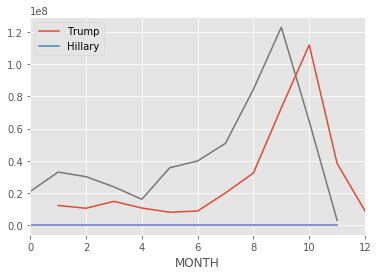

In [71]:
ax1 = groupedMonthTrumpExpenses.plot(x="MONTH", y="TRANSACTION_AMT")
groupedMonthHillaryExpenses.plot(ax=ax1)
ax1.legend(["Trump", "Hillary"])

Once again we see that Hillary had more expenses, that naturally follows the trend of more accumulated contributuions

What are the more common expense purposes ? ( Actually started working on it before looking at the next question )

**4. Identify the biggest recipients of campaign expenditures.**

In [72]:
purposeExpensesTrump = trumpExpenses16.groupby(['PURPOSE']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).reset_index().head(5)
purposeExpensesHillary = hillaryExpenses16.groupby(['PURPOSE']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).reset_index().head(5)

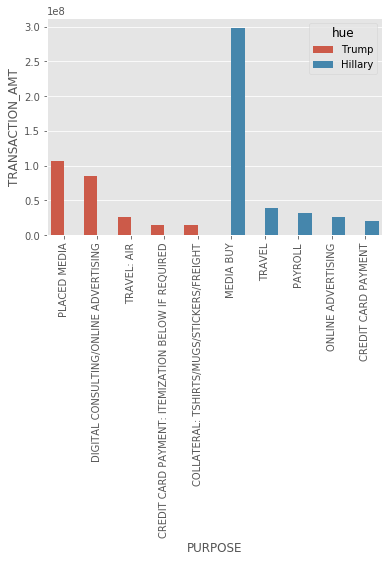

In [73]:
purposeExpensesTrump['hue']='Trump'
purposeExpensesHillary['hue']="Hillary"

res=pd.concat([purposeExpensesTrump,purposeExpensesHillary])
sns.barplot(x='PURPOSE',y='TRANSACTION_AMT',data=res,hue='hue')
plt.xticks(rotation=90)
plt.show()

Here we can see that Trump's campaign was focusing primarily in Media services,<br> whereas Hillary ditributed her campaign budget in various channels. It is very interesting to focus on the fact that Trump's strategy was to "bet" on Media channels

**5. Examine the geographical distribution, at the state level, of campaign expenditures. For each state, calculate the expenditures per voter. This will require that you find a source with the number of registered voters per state. Examine the situation for swing states.**

After a brief Google search we could find this resource: 
https://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-580.html <br>
In table 4a, we have an XLS file of the registered voters per state. Which is exactly what's needed       


In [74]:
registeredVoters = pd.read_excel('table04a.xlsx', sheet_name='Table 4a', skiprows=3, skipfooter=5, header=[0, 1])
print(registeredVoters.shape)
registeredVoters.head()

(50, 13)


STATE   Total Population Total Citizen Population  \
  Unnamed: 0_level_1 Unnamed: 1_level_1       Unnamed: 2_level_1   
0      UNITED STATES             245502                   224059   
1            ALABAMA               3717                     3651   
2             ALASKA                518                      502   
3            ARIZONA               5196                     4585   
4           ARKANSAS               2216                     2116   

        Registered                                                \
  Total registered Percent registered\n(Total) Margin of Error 1   
0           157596                     64.1935           0.29761   
1             2526                     67.9617           2.50241   
2              358                     69.0653           2.64986   
3             3145                     60.5332           2.24609   
4             1456                     65.6858           2.65021   

                                                          Voted  \
  Percent registered\n(Citizen) Margin of Error 1.1 Total voted   
0                       70.3369             0.29680      137537   
1                       69.1816             2.49836        2095   
2                       71.3036             2.63491         308   
3                       68.6090             2.27039        2769   
4                       68.8026             2.64689        1241   

                                                                     \
  Percent voted\n(Total) Margin of Error 1 Percent voted\n(Citizen)   
0                56.0226           0.30812                  61.3841   
1                56.3712           2.65954                  57.3830   
2                59.4061           2.81524                  61.3313   
3                53.2880           2.29268                  60.3972   
4                56.0106           2.77088                  58.6683   

                       
  Margin of Error 1.1  
0             0.31636  
1             2.67570  
2             2.83672  
3             2.39265  
4             2.81331

In [75]:
registeredVoters = registeredVoters[['STATE', 'Registered']]
registeredVoters = registeredVoters[registeredVoters['STATE', 'Unnamed: 0_level_1'] != 'UNITED STATES']

In [76]:
regStates = registeredVoters["STATE", 'Unnamed: 0_level_1']
regVoters = registeredVoters["Registered",'Total registered']
stateInit = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI','ID', 'IL', 'IN', 'IA', 'KS', 
             'KY', 'LA', 'ME','MD', 'MA', 'MI','MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
             'ND', 'OH', 'OK', 'OR', 'PA', 'RI','SC', 'SD', 'TN', 'TX', 'UT','VT', 'VA', 'WA', 'WV']
regStatesVoters = pd.DataFrame(data={'STATE':stateInit, "REG_VOTERS":regVoters, "FULL_NM":regStates})
regStatesVoters.shape
regStatesVoters.head(5)

,STATE,REG_VOTERS,FULL_NM
1,AL,2526,ALABAMA
2,AK,358,ALASKA
3,AZ,3145,ARIZONA
4,AR,1456,ARKANSAS
5,CA,16096,CALIFORNIA


Finding a list of all US states: <br>
https://gist.github.com/iamjason/8f8f4bc00c13de86bcad

In [77]:
allStates = ["Alaska",
                  "Alabama",
                  "Arkansas",
                  "American Samoa",
                  "Arizona",
                  "California",
                  "Colorado",
                  "Connecticut",
                  "District of Columbia",
                  "Delaware",
                  "Florida",
                  "Georgia",
                  "Guam",
                  "Hawaii",
                  "Iowa",
                  "Idaho",
                  "Illinois",
                  "Indiana",
                  "Kansas",
                  "Kentucky",
                  "Louisiana",
                  "Massachusetts",
                  "Maryland",
                  "Maine",
                  "Michigan",
                  "Minnesota",
                  "Missouri",
                  "Mississippi",
                  "Montana",
                  "North Carolina",
                  "North Dakota",
                  "Nebraska",
                  "New Hampshire",
                  "New Jersey",
                  "New Mexico",
                  "Nevada",
                  "New York",
                  "Ohio",
                  "Oklahoma",
                  "Oregon",
                  "Pennsylvania",
                  "Puerto Rico",
                  "Rhode Island",
                  "South Carolina",
                  "South Dakota",
                  "Tennessee",
                  "Texas",
                  "Utah",
                  "Virginia",
                  "Virgin Islands",
                  "Vermont",
                  "Washington",
                  "Wisconsin",
                  "West Virginia",
                  "Wyoming"]
allStates = [x.upper() for x in allStates]
missingStates = np.setdiff1d(allStates,regStates)
missingStates

array(['AMERICAN SAMOA', 'GUAM', 'PUERTO RICO', 'VIRGIN ISLANDS',
       'WISCONSIN', 'WYOMING'], dtype='<U20')

Group Expenses By State & merge with the population data

In [78]:
stateExpensesTrump = trumpExpenses16[['STATE','TRANSACTION_AMT']].groupby(['STATE']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).reset_index()
stateExpensesHillary = hillaryExpenses16[['STATE','TRANSACTION_AMT']].groupby(['STATE']).sum().sort_values(['TRANSACTION_AMT'],ascending=False).reset_index()

In [79]:
stateExpensesTrump = pd.merge(stateExpensesTrump, regStatesVoters[['STATE','REG_VOTERS','FULL_NM']], on='STATE', how='inner')
print(stateExpensesTrump.shape)
stateExpensesTrump.head(5)

(49, 4)


,STATE,TRANSACTION_AMT,REG_VOTERS,FULL_NM
0,VA,1.098994e+08,4399,VIRGINIA
1,TX,9.688253e+07,11724,TEXAS
2,NY,2.549983e+07,9142,NEW YORK
3,NJ,1.909532e+07,4165,NEW JERSEY
4,LA,1.599482e+07,2446,LOUISIANA


In [80]:
stateExpensesHillary = pd.merge(stateExpensesHillary, regStatesVoters[['STATE','REG_VOTERS','FULL_NM']], on='STATE', how='inner')
print(stateExpensesHillary.shape)
stateExpensesHillary.head(5)

(49, 4)


,STATE,TRANSACTION_AMT,REG_VOTERS,FULL_NM
0,DC,3.331118e+08,420,DISTRICT OF COLUMBIA
1,NY,5.731997e+07,9142,NEW YORK
2,NJ,4.155900e+07,4165,NEW JERSEY
3,AR,1.633215e+07,1456,ARKANSAS
4,CA,1.302954e+07,16096,CALIFORNIA


Create the Column to handle the costs per voter then sort by that amount for our final output

In [81]:
stateExpensesTrump["COST_PER_VOTER"] = stateExpensesTrump["TRANSACTION_AMT"] / stateExpensesTrump["REG_VOTERS"]
stateExpensesHillary["COST_PER_VOTER"] = stateExpensesHillary["TRANSACTION_AMT"] / stateExpensesHillary["REG_VOTERS"]
stateExpensesTrump["COST_PER_VOTER"] = stateExpensesTrump["COST_PER_VOTER"].astype(int)
stateExpensesHillary["COST_PER_VOTER"] = stateExpensesHillary["COST_PER_VOTER"].astype(int)

In [82]:
sortedExpensesVoterTrump = stateExpensesTrump.sort_values('COST_PER_VOTER',ascending=False)
sortedExpensesVoterTrump.head(10)

,STATE,TRANSACTION_AMT,REG_VOTERS,FULL_NM,COST_PER_VOTER
0,VA,1.098994e+08,4399,VIRGINIA,24982
9,DC,6.482035e+06,420,DISTRICT OF COLUMBIA,15433
6,NH,1.087707e+07,763,NEW HAMPSHIRE,14255
1,TX,9.688253e+07,11724,TEXAS,8263
4,LA,1.599482e+07,2446,LOUISIANA,6539
3,NJ,1.909532e+07,4165,NEW JERSEY,4584
7,MO,9.516119e+06,3333,MISSOURI,2855
2,NY,2.549983e+07,9142,NEW YORK,2789
5,FL,1.244503e+07,9604,FLORIDA,1295
15,IA,1.877504e+06,1657,IOWA,1133


In [98]:
sortedExpensesVoterHillary = stateExpensesHillary.sort_values('COST_PER_VOTER',ascending=False)
sortedExpensesVoterHillary.head(10)
notDCHillary = sortedExpensesVoterHillary.iloc[1:]

Wikipedia explains Swing states being the ones that can be won by either party by a swing in votes <br> https://en.wikipedia.org/wiki/Swing_state<br>
We also get details on which were considered the Swing states for 2016 <br>
https://en.wikipedia.org/wiki/Swing_state#:~:text=According%20to%20a%20pre%2Delection,%2C%20North%20Carolina%2C%20and%20Maine.<br>


In [92]:
fig = px.choropleth(sortedExpensesVoterTrump,  # Input Pandas DataFrame
                    locations=sortedExpensesVoterTrump["STATE"],  # DataFrame column with locations
                    color=sortedExpensesVoterTrump["COST_PER_VOTER"],  # DataFrame column with color values
                    hover_name=sortedExpensesVoterTrump["TRANSACTION_AMT"].astype(int), # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State costs of Trump`s Campaign per registered voter', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

In [99]:
fig2 = px.choropleth(notDCHillary,  # Input Pandas DataFrame
                    locations=notDCHillary["STATE"],  # DataFrame column with locations
                    color=notDCHillary["COST_PER_VOTER"],  # DataFrame column with color values
                    hover_name=notDCHillary["TRANSACTION_AMT"].astype(int), # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig2.update_layout(
    title_text = 'State costs of Hillary`s Campaign per registered voter', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig2.show()

We can see a similar pattern as to where both candidates used their campaign budget. They have similar ammounts spent to <br>
both the bigger states and each of them focusing a bigger budget percentage to some of the swing states <br>
that makes us thing if they considered "tradeoffs" between who is getting which swing states.